## Problem Statement

Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm

## Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

Dataset Origin:

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset


**The dataset "online_shoppers_intention.csv" contains the following features:**

1. Administrative: Represents the number of pages visited by the user on the website related to the administrative tasks.
2. Administrative_Duration: Represents the total time spent by the user on administrative-related pages.
3. Informational: Represents the number of pages visited by the user on the website related to gathering information.
4. Informational_Duration: Represents the total time spent by the user on informational pages.
5. ProductRelated: Represents the number of pages visited by the user on the website related to the products.
6. ProductRelated_Duration: Represents the total time spent by the user on product-related pages.
7. BounceRates: Represents the bounce rate of the website, i.e., the percentage of visitors who leave the site after viewing only one page.
8. ExitRates: Represents the exit rate of the website, i.e., the percentage of visitors who leave the site from a particular page.
9. PageValues: Represents the average value of the pages visited by the user.
10. SpecialDay: Represents the closeness of the browsing date to a special day (e.g., Mother's Day, Valentine's Day).
11. Month: Represents the month of the year in which the browsing occurred.
12. OperatingSystems: Represents the operating system used by the user.
13. Browser: Represents the browser used by the user.
14. Region: Represents the geographical region of the user.
15. TrafficType: Represents the type of traffic source from which the user arrived at the website.
16. VisitorType: Represents the type of visitor (returning or new).
17. Weekend: Represents whether the browsing occurred on a weekend (True/False).
18. Revenue: Represents whether the visitor generated revenue for the website (True/False).

## Required Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split


## Data Ingestion

In [3]:
file_path = "online_shoppers_intention.csv"

df = pd.read_csv(file_path)

In [4]:
df.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.5
BounceRates,0.2,0.0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.0,0.0,0.0


## Basic Data Analysis

In [4]:
df.shape

(12330, 18)

In [5]:
print("Features found in the Dataset:")

for i, col in enumerate(df.columns):
    print(f"{i+1}) {col}")

Features found in the Dataset:
1) Administrative
2) Administrative_Duration
3) Informational
4) Informational_Duration
5) ProductRelated
6) ProductRelated_Duration
7) BounceRates
8) ExitRates
9) PageValues
10) SpecialDay
11) Month
12) OperatingSystems
13) Browser
14) Region
15) TrafficType
16) VisitorType
17) Weekend
18) Revenue


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**No null values found.**

## EDA & FE

### **Convert month names to numeric values**



In [10]:
df.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [11]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [12]:
# Define mapping dictionary for month names to numeric values
month_mapping = {'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9, 'Dec':12}

# Map month names to numeric values
df['Month'] = df['Month'].map(month_mapping)

In [13]:
df.Month.unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12])

### **VisitorType** 

The variable 'VisitorType' is not ordinal because it does not have a natural order or hierarchy among its categories. Ordinal variables have categories that can be ranked or ordered based on their relative position or importance.

In the case of 'VisitorType', the categories are typically non-ordinal, such as 'New Visitor', 'Returning Visitor', and 'Other'. These categories do not have a clear ranking or inherent order. Therefore, treating 'VisitorType' as an ordinal variable may introduce incorrect assumptions or interpretations in the analysis.

In [14]:
df.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [15]:
df.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [16]:
visitor_encoded = pd.get_dummies(df.VisitorType)

In [18]:
# adding encoded columns to the main dataset

df = pd.concat([df, visitor_encoded], axis=1)

# removing visitorType columns as not needed anymore
df.drop(columns=["VisitorType"], inplace=True)

In [19]:
# Modified dataset
df.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.5
BounceRates,0.2,0.0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.0,0.0,0.0


### Graphical Analysis

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


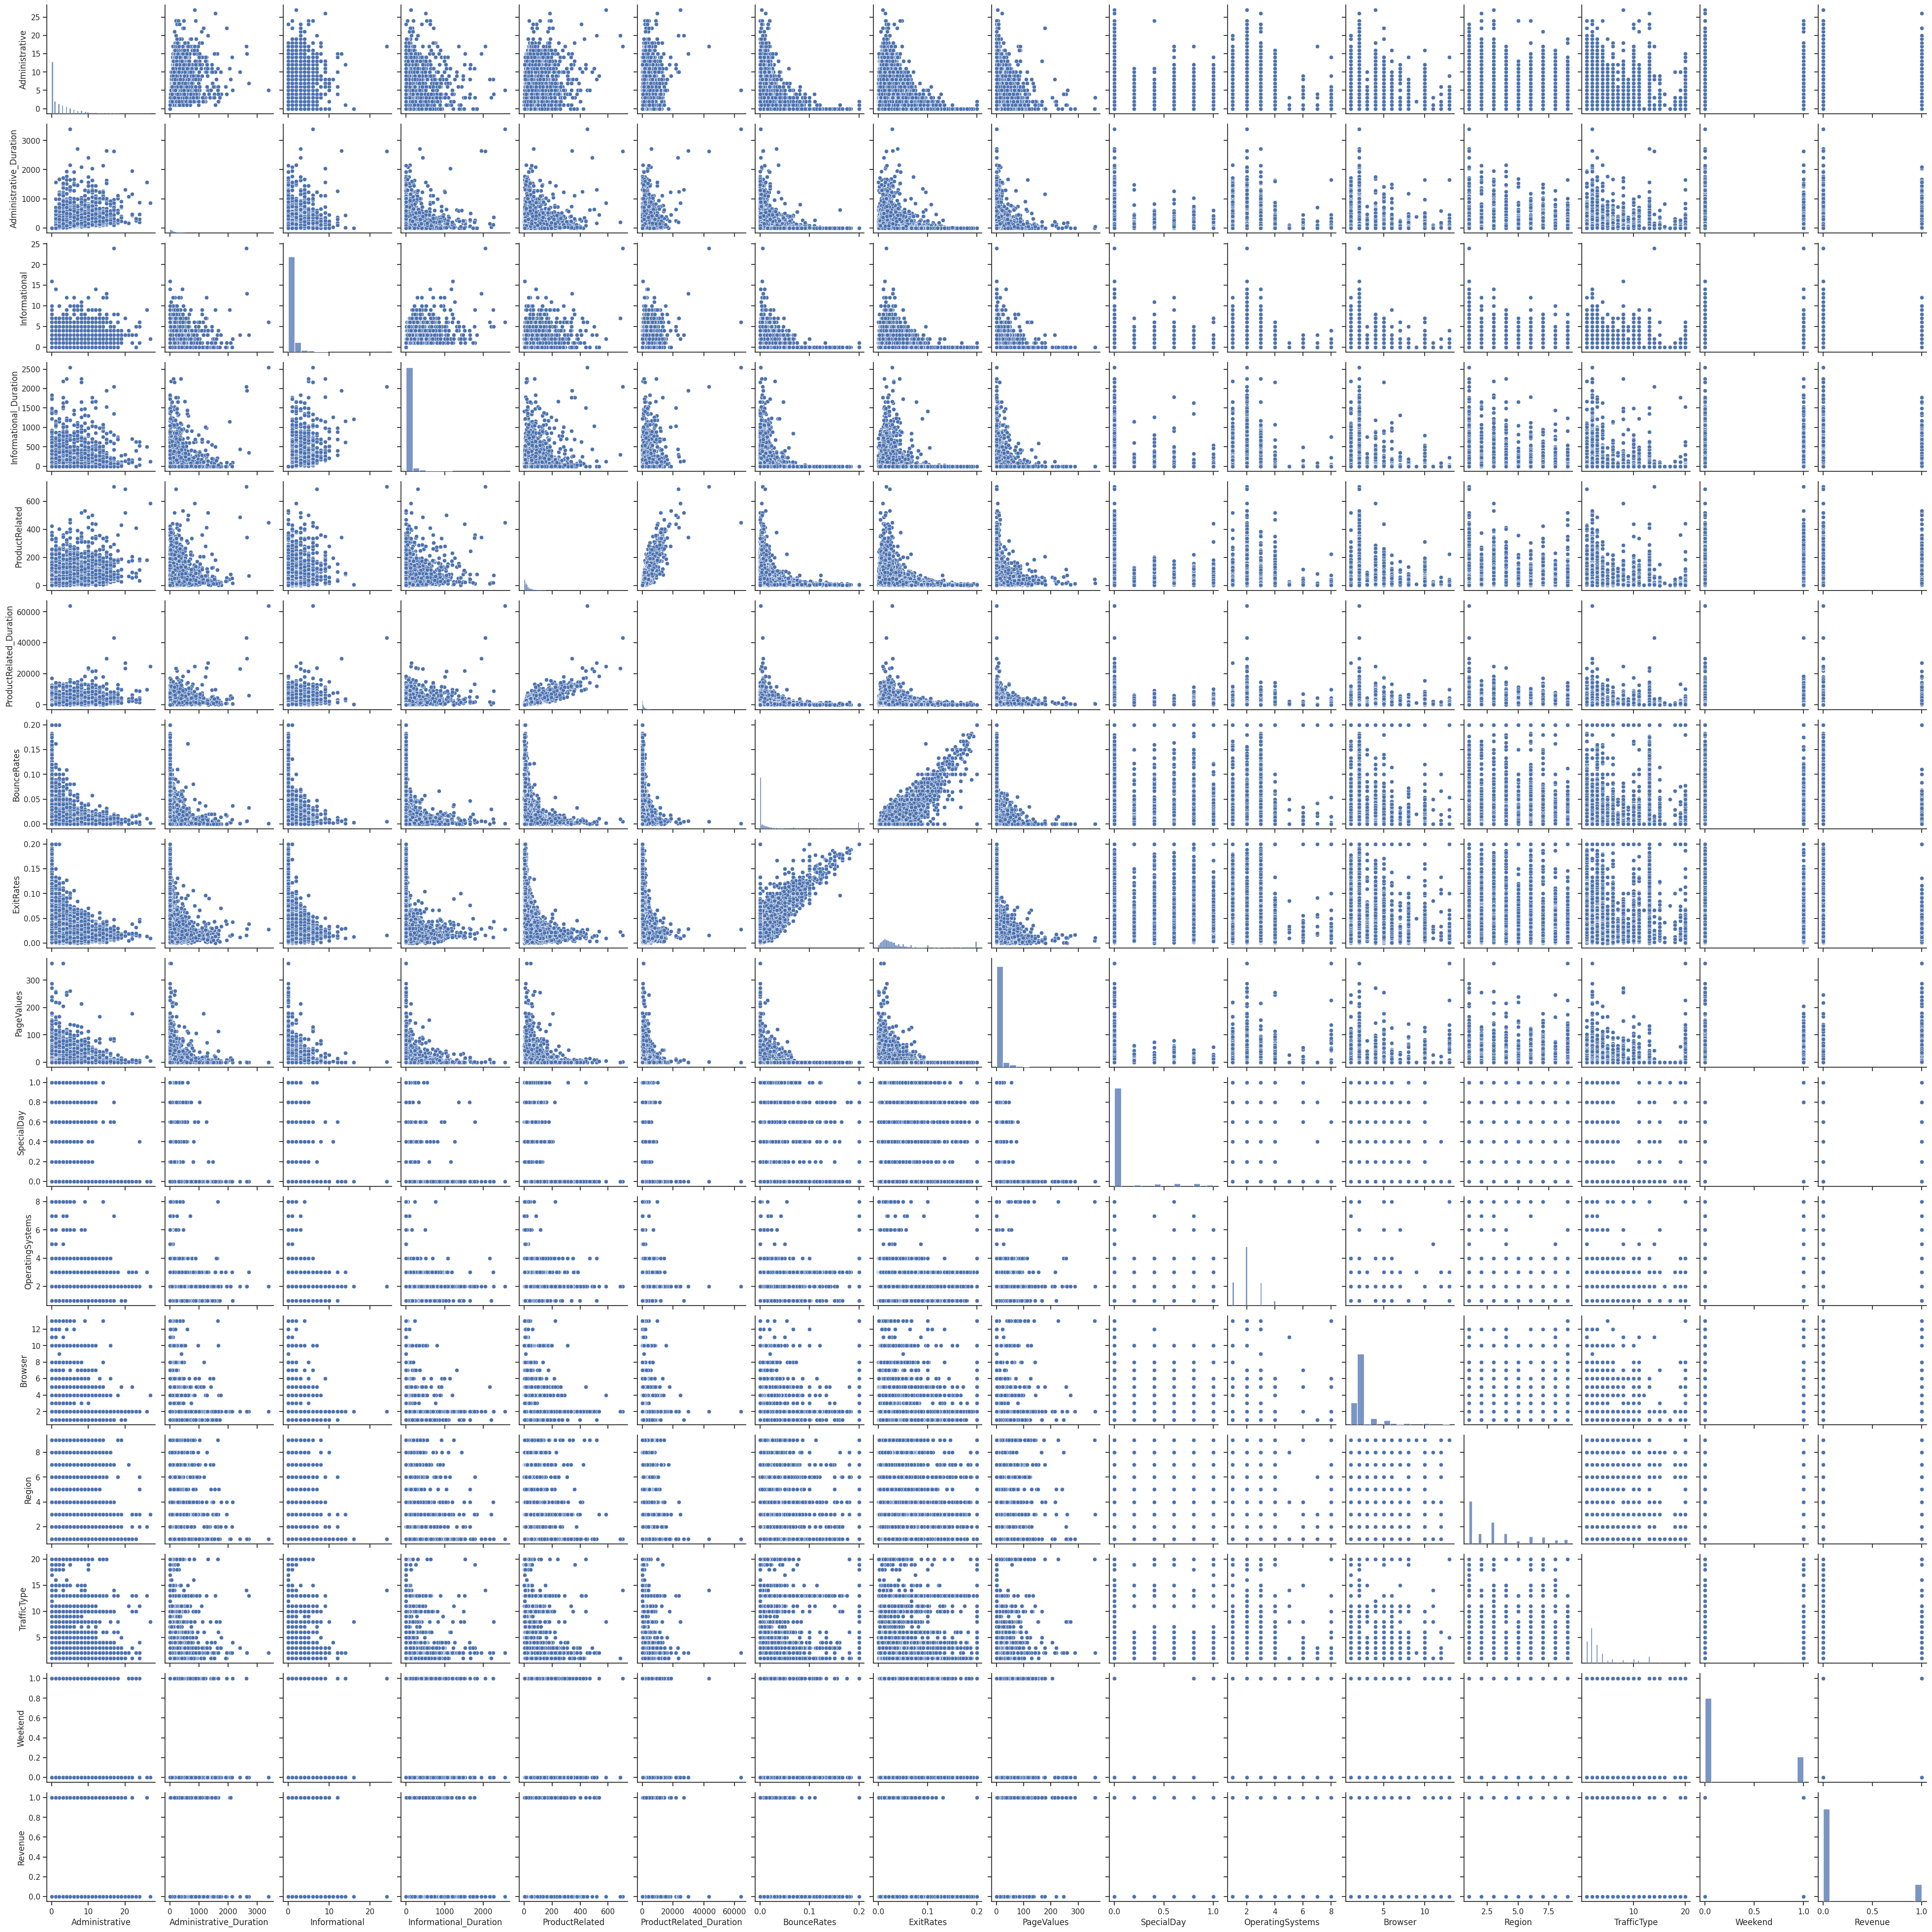

In [6]:
# Create subplots using seaborn pairplot
sns.set(style="ticks")
sns.pairplot(df, corner=False)

# Show the plot
plt.show()

## Feature seperation

In [8]:
# Split the dataset
X = df.drop(['Revenue', 'Weekend', 'Informational_Duration'], axis=1)
y_revenue = df['Revenue']
y_weekend = df['Weekend']
y_duration = df['Informational_Duration']

In [9]:
print(f"Input Features : ")
for i, feature in enumerate(X.columns):
    print(f"{i+1}) {feature}")

Input Features : 
1) Administrative
2) Administrative_Duration
3) Informational
4) ProductRelated
5) ProductRelated_Duration
6) BounceRates
7) ExitRates
8) PageValues
9) SpecialDay
10) Month
11) OperatingSystems
12) Browser
13) Region
14) TrafficType
15) VisitorType


## Feature Selection

##### Feature selection using the **chi-square** test for classification problems

In [13]:
# Apply SelectKBest with chi2 test to get feature scores
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y_revenue)

# Get the feature scores and p-values
feature_scores = selector.scores_
p_values = selector.pvalues_

# Sort the features by their scores in descending order
sorted_indices = feature_scores.argsort()[::-1]

ValueError: could not convert string to float: 'Feb'

In [ ]:
# Create a dataframe for sorted_indices
df_sorted = pd.DataFrame(columns=['Feature', 'Score', 'p-value'])

# Iterate over the sorted_indices and add feature details to the dataframe
for idx in sorted_indices:
    feature_name = X.columns[idx]
    score = round(feature_scores[idx],2)
    p_value = round(p_values[idx], 6)
    new_row = {'Feature': feature_name, 'Score': score, 'p-value': p_value}
    df_sorted.loc[len(df_sorted)] = new_row

# Print the sorted dataframe
df_sorted

##### Feature selection using ANOVA

In [ ]:
# Apply the ANOVA test using the f_classif function
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to store the results
anova_df = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})

# Sort the DataFrame based on p-values in ascending order
anova_df.sort_values('p-value', inplace=True)

anova_df['p-value'] = anova_df['p-value'].apply(lambda x: round(x, 4))

anova_df

### Multicolinearity

In [ ]:
# Add a constant column to the DataFrame
df_with_const = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF values
vif